In [1]:
import sys
sys.path.insert(0, '../')
%load_ext autoreload
%autoreload 2
from lib.utils import *
import itertools
import pandas as pd
from lib.plot import plot_execution_time_comparison

In [2]:
config_filename = "../data/YAML/region_y3_div.yaml"
n_iter_UE = 250
# percNonUVal = 80
n_time = 36
n_time_inc_start = 13
n_time_inc_end = 24
step_size_UE = 0.01
region_ = "region_y3_div"
setting_region = "6_9_AVG5_th1_pad_MultipleTimes"
fileName0 = "_StartHour_6_AVG5_pad_theta1e+00"
folderName0 = "Mar2May_2018_new_5-22_"
fairness = "0_0_0_100_0" # Corresponds to RHSMultiplier = [1, 1.1, 1.5, 2, 2.5]
n_iter_ADMM = 15000
n_companies_ADMM = 1
n_companies_cost_list = [1, 10, 100, 1000]
rho = 20
# rho_list = [20]
percNonUVal_list = [80, 85, 90, 95]
budget_list = [10000, 2000, 800, 200] # [10000, 5000, 2000, 1000, 800, 500, 200, 100]
VOT_list = [2.63, 1.315] # [2.63, 1.315]
solver_list = ["Gurobi", "Mosek"] # ["ADMM", "Gurobi", "Mosek"]
# solver_list = ["Mosek"]
solve_binarization = 1 # 1=True, 0=False
seed_solver = 2
seed_ADMM = 2
seed_data = 2
MIPGap = 0.01
# skip_set = {(20, 70, 10000, 2.63), (20, 70, 10000, 1.315)}
# skip_set = {(20, 70, 1000, 2.63), (20, 70, 1000, 1.315), (20, 70, 100, 2.63), (20, 70, 100, 1.315)}
skip_set = {}

In [3]:
time_dict = {}
colsDict = {"solver_name": [], "percNonUVal": [], "VOT": [], "budget": [], "runtime": []}
for solver_name, percNonUVal, VOT, budget in itertools.product(solver_list, percNonUVal_list, VOT_list, budget_list):
    seed_solving_algo = seed_ADMM if solver_name == "ADMM" else seed_solver
    
    colsDict["solver_name"].append(solver_name)
    colsDict["percNonUVal"].append(percNonUVal)
    colsDict["VOT"].append(VOT)
    colsDict["budget"].append(budget)
    # Get .mat file address 
    folderAddress = get_solution_result_folder_address(budget = budget, \
                                             seed_data = seed_data, 
                                             seed_solving_algo = seed_solving_algo,
                                             VOT = VOT,
                                             fairness = fairness,
                                             percNonUVal = percNonUVal,
                                             n_time_inc_start = n_time_inc_start,
                                             n_time_inc_end = n_time_inc_end,
                                             step_size = step_size_UE,
                                             iterRun = n_iter_UE,
                                             region_ = region_,
                                             setting_region = setting_region,
                                             solver_name = solver_name,
                                             n_iter_ADMM = n_iter_ADMM, 
                                             rho = rho,
                                            )
    fileAddress = os.path.join(folderAddress, "runtimes.csv")
    time_records = pd.read_csv(fileAddress, header = None)
    colsDict["runtime"].append(time_records.iloc[-1, 0])

In [4]:
runtime_df = pd.DataFrame.from_dict(colsDict)

In [5]:
runtime_ADMM = {95: 0.69, 90: 1.19, 85: 1.27, 80: 2.29}
runtime_solvers = {}
runtime_comparison = {}

## 20% Penetration Rate 

In [6]:
runtime_solvers[80] = runtime_df[runtime_df['percNonUVal']==80].groupby(['solver_name', 'percNonUVal']).agg({'runtime': ['mean', 'min', 'max']})
runtime_solvers[80]

runtime                       
                               mean        min         max
solver_name percNonUVal                                   
Gurobi      80            26.712798   9.711559   44.702062
Mosek       80           250.148957  36.383463  486.175701

In [7]:
runtime_comparison[80] = runtime_solvers[80]/runtime_ADMM[80]
runtime_comparison[80]

runtime                       
                               mean        min         max
solver_name percNonUVal                                   
Gurobi      80            11.664977   4.240855   19.520551
Mosek       80           109.235352  15.887975  212.303800

## 15% Penetration Rate 

In [8]:
runtime_solvers[85] = runtime_df[runtime_df['percNonUVal']==85].groupby(['solver_name', 'percNonUVal']).agg({'runtime': ['mean', 'min', 'max']})
runtime_solvers[85]

runtime                       
                               mean        min         max
solver_name percNonUVal                                   
Gurobi      85             8.559223   1.707396   13.356177
Mosek       85           151.892630  15.905964  244.790829

In [9]:
runtime_comparison[85] = runtime_solvers[85]/runtime_ADMM[85]
runtime_comparison[85]

runtime                       
                               mean        min         max
solver_name percNonUVal                                   
Gurobi      85             6.739545   1.344406   10.516675
Mosek       85           119.600496  12.524381  192.748684

## 10% Penetration Rate 

In [10]:
runtime_solvers[90] = runtime_df[runtime_df['percNonUVal']==90].groupby(['solver_name', 'percNonUVal']).agg({'runtime': ['mean', 'min', 'max']})
runtime_solvers[90]

runtime                       
                              mean        min         max
solver_name percNonUVal                                  
Gurobi      90            2.715929   0.732031    5.164594
Mosek       90           69.505481  10.610782  169.411075

In [11]:
runtime_comparison[90] = runtime_solvers[90]/runtime_ADMM[90]
runtime_comparison[90]

runtime                      
                              mean       min         max
solver_name percNonUVal                                 
Gurobi      90            2.282293  0.615152    4.339995
Mosek       90           58.407968  8.916624  142.362248

## 5% Penetration Rate 

In [12]:
runtime_solvers[95] = runtime_df[runtime_df['percNonUVal']==95].groupby(['solver_name', 'percNonUVal']).agg({'runtime': ['mean', 'min', 'max']})
runtime_solvers[95]

runtime                    
                             mean       min       max
solver_name percNonUVal                              
Gurobi      95           1.040125  0.277789  1.811586
Mosek       95           1.942221  1.425819  2.124024

In [13]:
runtime_comparison[95] = runtime_solvers[95]/runtime_ADMM[95]
runtime_comparison[95]

runtime                    
                             mean       min       max
solver_name percNonUVal                              
Gurobi      95           1.507428  0.402592  2.625488
Mosek       95           2.814813  2.066404  3.078296

# Plot

In [16]:
plot_dict = {}
x_axis = sorted(percNonUVal_list, reverse=True)
for solver_name in solver_list: 
    plot_dict[solver_name] = []
    for percNonUVal in x_axis:
        plot_dict[solver_name].append(runtime_comparison[percNonUVal]['runtime']['mean'][solver_name].item())

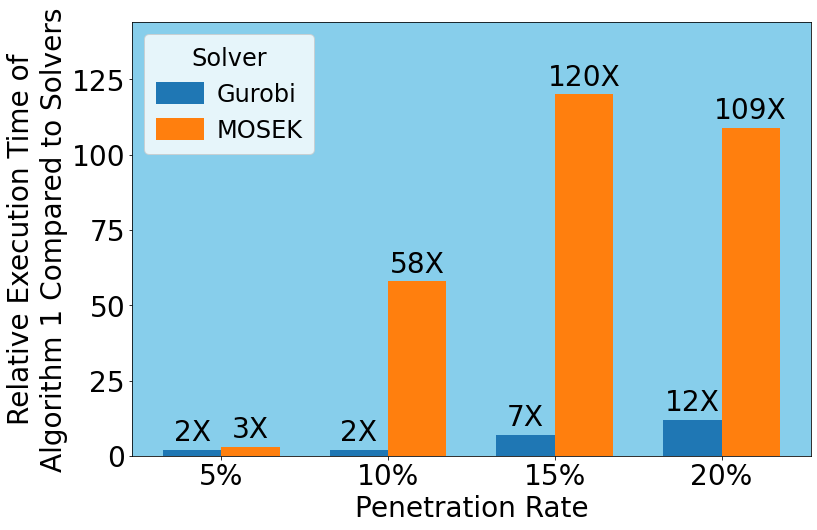

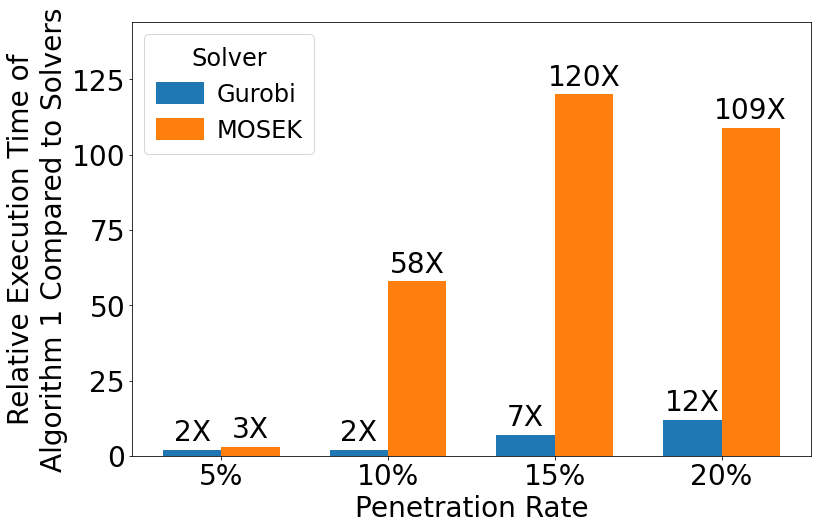

In [19]:
plot_execution_time_comparison(data_dict = plot_dict, 
                               percNonUVal_list = x_axis, 
                               blueBack = True, 
                               large_size = False, 
                               fontsize = 28)
plot_execution_time_comparison(data_dict = plot_dict, 
                               percNonUVal_list = x_axis, 
                               blueBack = False, 
                               large_size = False, 
                               fontsize = 28)